# Исследование данных интернет-магазина "Стримчик"
Заказчик этого исследования — интернет-магазин "Стримчик", который продаёт по всему миру компьютерные игры. Нам дали данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 

**Цель исследования** - спрогнозировать продажи на 2017 год.

**Ход исследования**
Данные получим из датафрейма games. Перед тем, как проводить анализ, проведем их предобработку, проверим на предмет наличия дубликатов и пропусков.

Далее проведем исследовательский анализ данных, посмотрим, сколько игр выпускалось в разные годы, как менялись продажи по платформам. 

Составим портрет пользователя каждого региона, определим для каждого самые популярные платформы и жанры.

Проверим гипотезы о равенстве рейтингов платформ и о равенстве рейтингов жанров Action и Sport.

Таким образом, исследование пройдет в 6 этапов:

- обзор данных
- предобработка данных
- исследовательский анализ данных
- составление портрета пользователя каждого региона
- проверка гипотез
- формулирование общего выводы

#### Загрузка данных

In [1]:
#импортируем библиотеки
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
#считываем csv-файл
games = pd.read_csv('/datasets/games.csv')

In [3]:
#выводим информацию и первые 5 строк датафрейма games
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Всего в датафрейме 16715 строк и 11 столбцов. Обращает на себя внимание большое количество пропусков в столбцах Critic_Score, User_Score и Rating. Также присутствсуют пропуски в столбцах Name, Year_of_Release и Genre. Следует привести названия столбцов к нижнему регистру и преобразовать данные в нужные типы.**

#### Подготовка данных

In [4]:
#приведем название столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [5]:
#оценим количество дубликатов в датафрейме
games.duplicated().sum()

0

In [6]:
#выведем количество неявных дубликатов
print(games[games.duplicated(['name', 'platform', 'year_of_release'])].count())
print(games[games.duplicated(['name', 'platform', 'year_of_release'])])

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64
                name platform  year_of_release   genre  na_sales  eu_sales  \
14244            NaN      GEN         1,993.00     NaN      0.00      0.00   
16230  Madden NFL 13      PS3         2,012.00  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00         83.00        5.5      E  


In [7]:
#удалим неявные дубликаты
games = games.drop_duplicates(['name', 'platform', 'year_of_release'])
print(games[games.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [8]:
#оценим количество пропусков в датафрейме
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

*Большое число пропусков в колонках critic_score, user_score и rating частично можно объяснить отсутствием платформ и средств для оценивания игр из-за их раннего выхода (1980-е годы).*

*Изучим пропуски в каждой колонке по отдельности:*

In [9]:
#изучим пропуски в колонке name
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


*Никакой информации об игре данная строка не предоставляют, можно ее удалить*

In [10]:
#удалим строки
games.drop([659],inplace=True)

In [11]:
#изучим пропуски в колонке name
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#посчитаем, какой процент от общего числа составляют пропуски
skip_data=(games['year_of_release'].isnull().sum() / len(games['name'])*100).round(3)
skip_data

1.61

*Количество пропусков менее 2%, можно удалить данные строки*

In [13]:
#удалим пропуски
games = games.dropna(subset=['year_of_release'])

In [14]:
#приведем тип данных столбца year_of_release к Int64
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [15]:
#приведем тип данных столбца critic_score к Int64
games['critic_score'] = games['critic_score'].astype('Int64')

*Количество пропусков в столбцах critic_score, user_score и rating достигает половины от величины датафрейма. Эти данные мы не можем удалить или чем-нибудь заменить*

In [16]:
#заменим пропуски на unknown
games['rating'] = games['rating'].fillna('unknown')
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [17]:
#разберем строки с аббревиатурой tbd
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,<NA>,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,<NA>,tbd,E


*Аббревиатуру 'tbd'  To Be Determined, означает, что данные еще не опубликованы и идет процесс оценки. Можно заменить это обозначение в строках на NaN*

In [18]:
#заменим tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [19]:
#приведем тип данных столбца user_score к float64
games['user_score'] = games['user_score'].astype('float64')

In [20]:
#посчитаем суммарные продажи во всех регионах
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


**В результате предобработки данных:**
- названия всех столбцов были приведены к нижнему регистру
- обработаны пропуски и удалены данные, которые не понадобятся при дальнейшем анализе
- проверен датафрейм на наличие дубликатов
- посчитаны суммарные продажи во всех регионах
- преобразованы данные в нужные типы

#### Исследовательский анализ данных

In [21]:
#посмотрим, сколько игр выпускалось в разные годы
games_per_year=games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_per_year.columns = ['year_of_release','games']
games_per_year

,year_of_release,games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


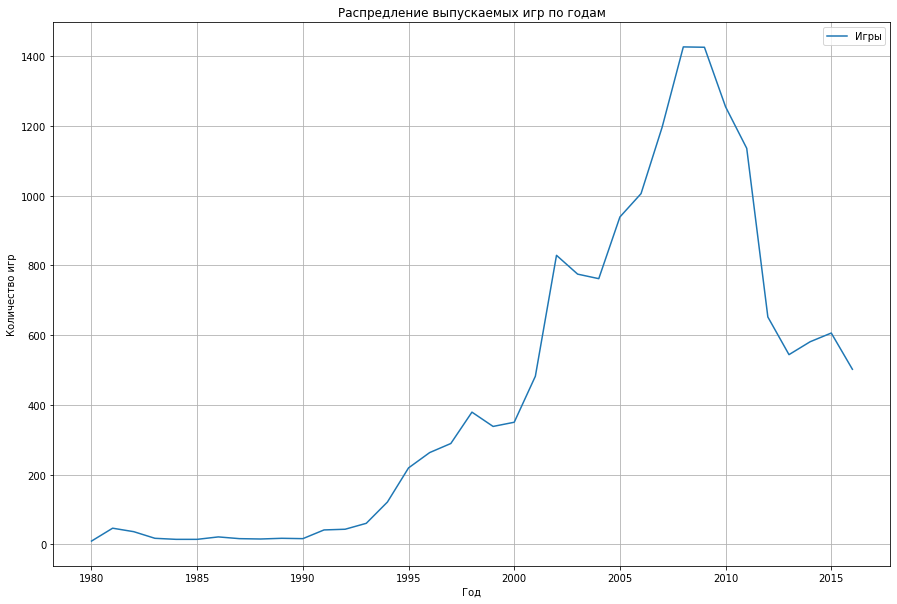

In [22]:
#построим график распределения выпущенных игр по годам
games_per_year.plot(x='year_of_release', y='games', figsize=(15,10), title='Распредление выпускаемых игр по годам', grid=True)
plt.xlabel('Год');
plt.ylabel('Количество игр')
plt.legend(['Игры']);
plt.show();

*В период с 1980 по 1994 год выпускалось мало игр. Начиная с 1995 года идет подъем, а резкий скачок происходит в 2002 году. С развитием мобильных устройств, к 2009 году интерес к играм начал угасать и с этого момента начинается спад в их производстве*

In [23]:
#посмотрим, как изменялись продажи по платформам
sales_per_year = pd.pivot_table(games, index=['platform'], values='total_sales', aggfunc='sum')
sales_per_year = sales_per_year.sort_values('total_sales', ascending=False).reset_index()
sales_per_year.columns = ['platform','total_sales']
sales_per_year

,platform,total_sales
0,PS2,"1,233.56"
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


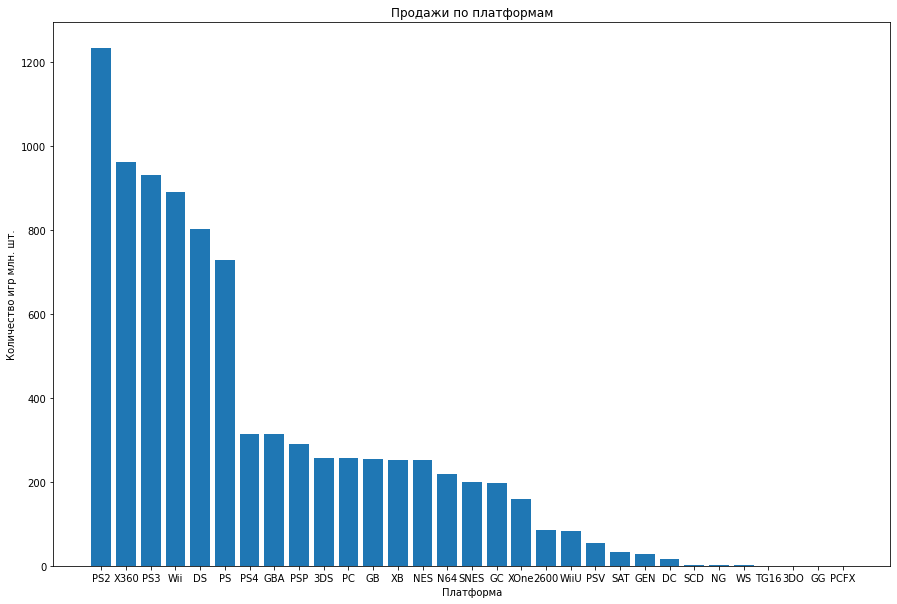

In [24]:
#построим распределение по годам
plt.figure(figsize=(15,10))
plt.bar(sales_per_year.platform, sales_per_year['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel("Платформа");
plt.ylabel("Количество игр млн. шт.");

*Выберем для анализа первые 6 платформ. Начиная с платформы PS4, объем продаж по платформам значительно падает*

In [25]:
#выведем топ-6 платформ
top_platforms = list(sales_per_year.platform[:6])
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

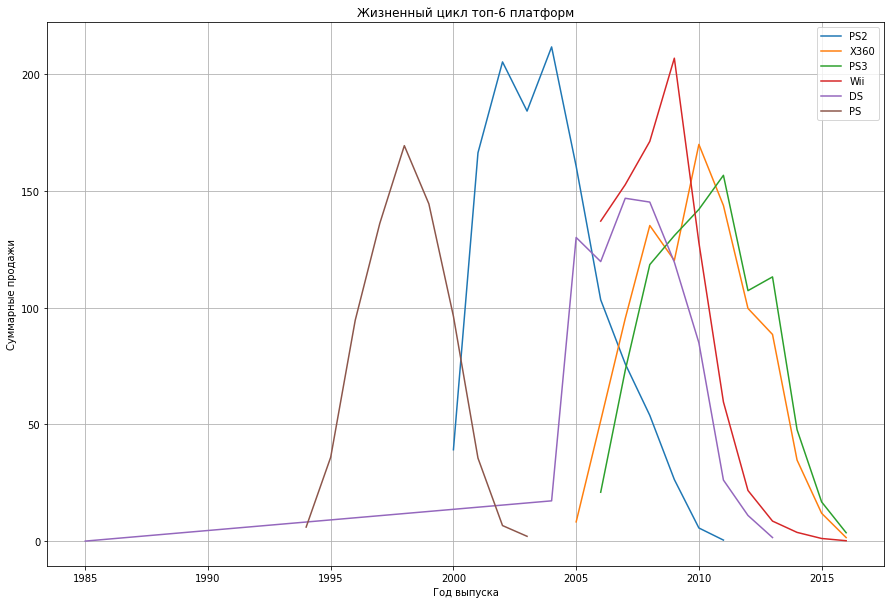

In [26]:
#построим распределения для этих 6 платформ
for name in top_platforms:
    (
    games.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (15, 10), label=name, grid=True)
    )
    plt.title('Жизненный цикл топ-6 платформ')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend()

*Исходя из графика можно сделать следующие выводы относительно сроков появления новых и исчезновения старых платформ:*
- PS2 - c 2000 по 2011 год
- Х360 - с 2005 по 2016, но продажи практически ушли в ноль 
- PS3 и Wii - c 2006 по 2016, продажи также ушли в ноль 
- DS - в 1985 была выпущена игра Strongest Tokyo University Shogi DS, после чего до 2004 года ничего не выпускалось. С 2004 года популярность начала расти, достигла пика в 2008 году, а в 2013 продажи практически прекратились
- PS - с 1994 по 2003 год

*Исходя из полученных данных, можно сделать вывод, что характерный срок жизни платформы составляет 10 лет. Данный период обусловлен выпуском новых платформ, которые сводят на нет  продажу более старых.*

In [27]:
print(games.loc[(games['platform'] == 'DS')].sort_values(by='year_of_release').head())

                                                 name platform  \
15957             Strongest Tokyo University Shogi DS       DS   
13463                               Cocoto Kart Racer       DS   
11517                           Kenshuui Tendo Dokuta       DS   
4421   The Urbz: Sims in the City (all regions sales)       DS   
7902                          Daigasso! Band Brothers       DS   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
15957             1985      Action      0.00      0.00      0.02         0.00   
13463             2004      Racing      0.04      0.00      0.00         0.00   
11517             2004  Simulation      0.00      0.00      0.08         0.00   
4421              2004  Simulation      0.40      0.01      0.02         0.00   
7902              2004        Misc      0.00      0.00      0.19         0.00   

       critic_score  user_score   rating  total_sales  
15957          <NA>         NaN  unknown         0.02  
1346

**Учитывая тенденцию к уменьшению продаж начиная с 2012 года, возьмем актуальный период с 2012 по 2016 год включительно**

In [28]:
#создадим новый датафрейм за актуальный период
new_games = games.query('year_of_release > 2011')
new_games.info()
new_games.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   Int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   Int64  
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 298.6+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.30,M,13.79


In [29]:
#посмотрим, как изменялись продажи по платформам
sales_per_year_new = pd.pivot_table(new_games, index=['platform'], values='total_sales', aggfunc='sum')
sales_per_year_new = sales_per_year_new.sort_values('total_sales', ascending=False).reset_index()
sales_per_year_new.columns = ['platform','total_sales']
sales_per_year_new

,platform,total_sales
0,PS4,314.14
1,PS3,288.78
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


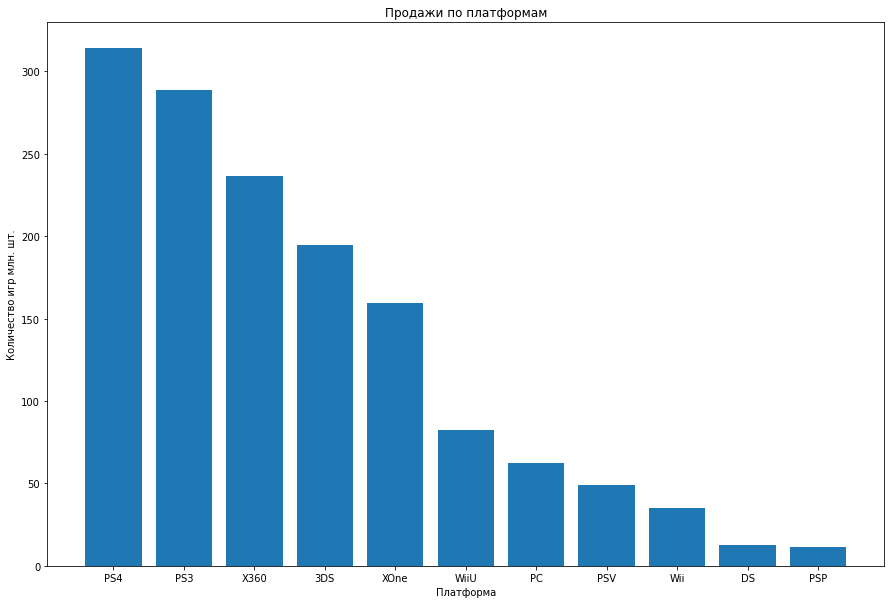

In [30]:
#построим распределение по годам
plt.figure(figsize=(15,10))
plt.bar(sales_per_year_new.platform, sales_per_year_new['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel("Платформа");
plt.ylabel("Количество игр млн. шт.");

In [31]:
#изучим распределение продаж по каждой платформе по годам
restriction = new_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
restriction

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


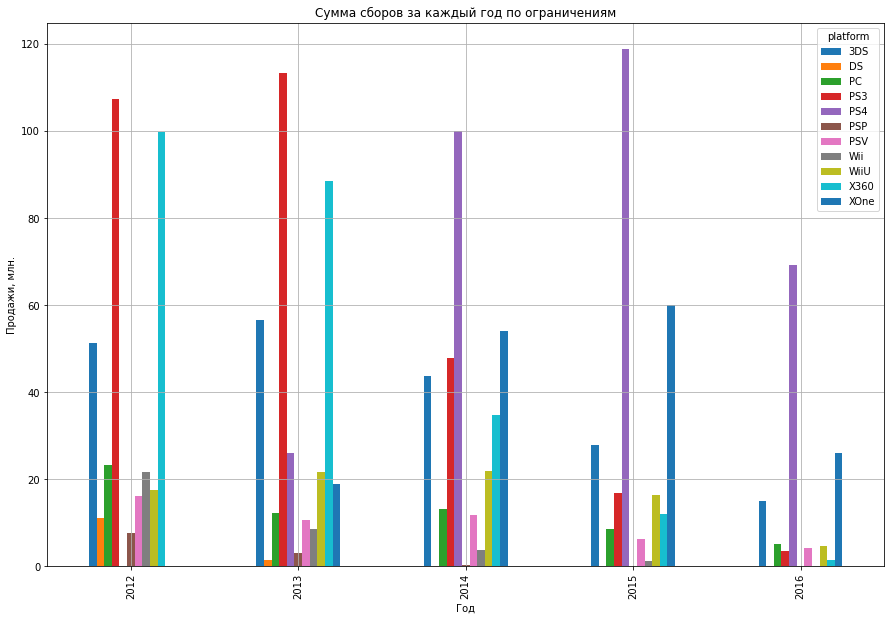

In [32]:
#построим распределение продаж по каждой платформе по годам
restriction.plot(kind='bar', grid=True, figsize=(15,10), title='Сумма сборов за каждый год по ограничениям')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')
plt.show()

*На основании полученных данных можно сделать вывод, что продажи к 2016 году у всех упали. К потенциально прибыльным платформам можно отнести XOne, PS4 и 3DS*

In [33]:
new_games['total_sales'].describe()

count   2,885.00
mean        0.50
std         1.25
min         0.01
25%         0.04
50%         0.12
75%         0.43
max        21.05
Name: total_sales, dtype: float64

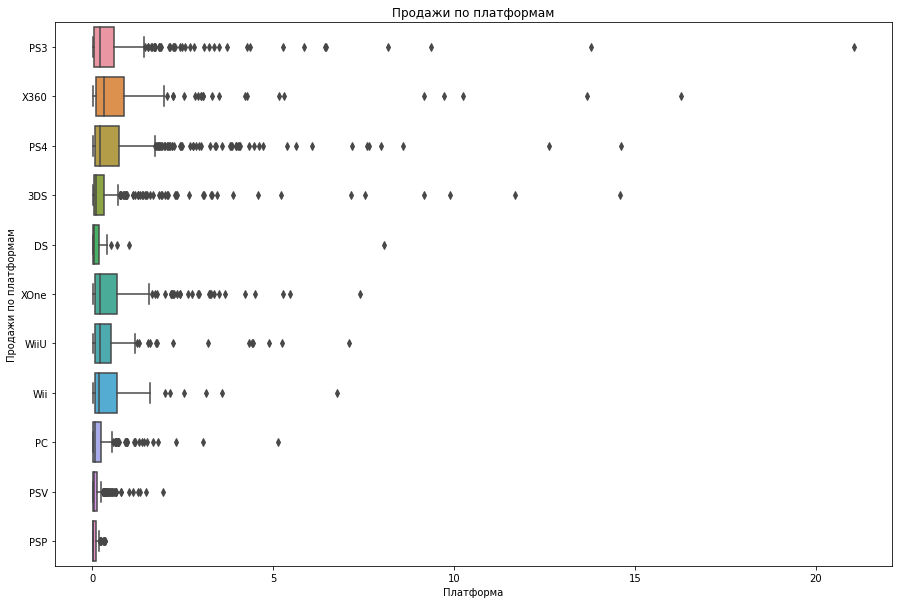

In [34]:
#построим боксплот по глобальным продажам по платформам
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=new_games.reset_index(), x='total_sales', y='platform')
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам');

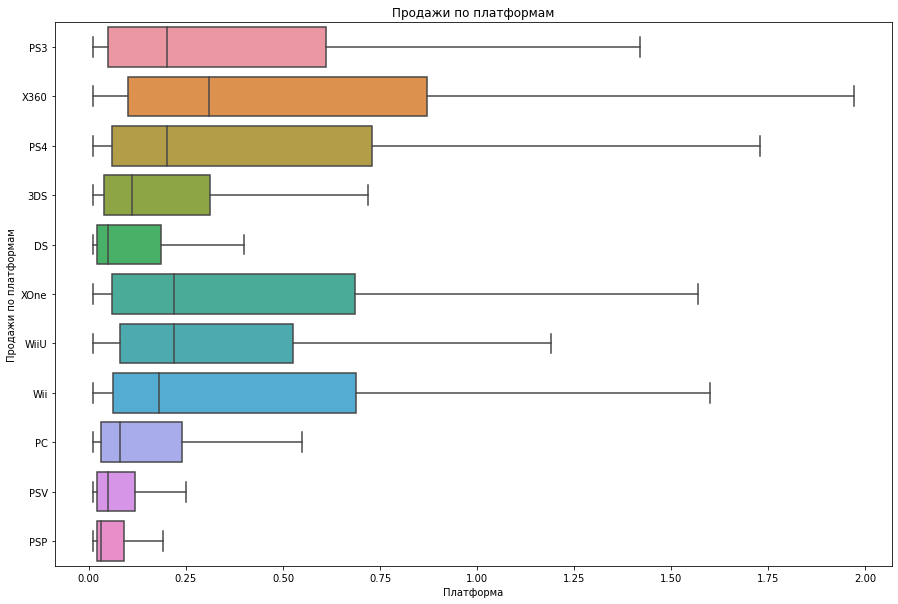

In [35]:
#построим боксплот по глобальным продажам по платформам без выбросов
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=new_games.reset_index(), x='total_sales', y='platform', showfliers=False)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам');

In [36]:
new_games.sort_values('total_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.30,M,13.79


*Медиана суммарных продаж составляет 0,12. У большинства платформ медианное значение превышает это значение. Наиболее перспективные являются платформы X360, PS4, XOne и Wii. Выбросы можно объяснить играми-бестселлерами.*

*Проанализируем влияние отзывов пользователей и критиков на продажи платформы PS4*

In [37]:
#посчитаем корреляцию для продаж и оценок критиков
new_games[new_games.platform == "PS4"][['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.00,0.41
critic_score,0.41,1.00


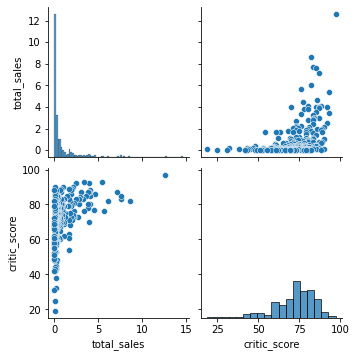

In [38]:
#построим диаграмму рассеивания для продаж и оценок критиков
sns.pairplot(new_games[new_games.platform == "PS4"][['total_sales', 'critic_score']])
plt.show()

In [39]:
#посчитаем корреляцию для продаж и оценок пользователей
new_games[new_games.platform == "PS4"][['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.00,-0.03
user_score,-0.03,1.00


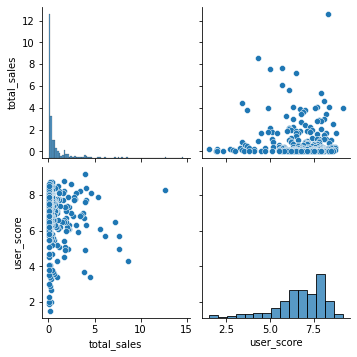

In [40]:
#построим диаграмму рассеивания для продаж и оценок пользователей
sns.pairplot(new_games[new_games.platform == "PS4"][['total_sales', 'user_score']])
plt.show()

*Отзывы пользователей не влияют на продажи. Значение корреляции на отзывы критиков - 0.41, также показывает слабую взаимосвязь с продажами, но свидетельствует о том, что к критикам прислушиваются больше, чем к пользователям.*

In [41]:
#соотнесем выводы с продажами игр на других платформах
new_games.loc[
    :, 
    ['platform', 
     'total_sales', 
     'critic_score', 
     'user_score']
].pivot_table(
    index='platform',
    values=['total_sales', 'critic_score', 'user_score'],
    aggfunc='corr'
)

critic_score  total_sales  user_score
platform                                                    
3DS      total_sales           0.32         1.00        0.20
         critic_score          1.00         0.32        0.72
         user_score            0.72         0.20        1.00
DS       total_sales            NaN         1.00        0.88
         user_score             NaN         0.88        1.00
PC       total_sales           0.24         1.00       -0.12
         critic_score          1.00         0.24        0.43
         user_score            0.43        -0.12        1.00
PS3      total_sales           0.33         1.00       -0.01
         critic_score          1.00         0.33        0.54
         user_score            0.54        -0.01        1.00
PS4      total_sales           0.41         1.00       -0.03
         critic_score          1.00         0.41        0.56
         user_score            0.56        -0.03        1.00
PSP      total_sales            NaN         1.00       -0.80
         user_score             NaN        -0.80        1.00
PSV      total_sales           0.09         1.00       -0.00
         critic_score          1.00         0.09        0.70
         user_score            0.70        -0.00        1.00
Wii      total_sales          -0.42         1.00        0.30
         critic_score          1.00        -0.42        0.82
         user_score            0.82         0.30        1.00
WiiU     total_sales           0.35         1.00        0.40
         critic_score          1.00         0.35        0.77
         user_score            0.77         0.40        1.00
X360     total_sales           0.36         1.00        0.01
         critic_score          1.00         0.36        0.56
         user_score            0.56         0.01        1.00
XOne     total_sales           0.42         1.00       -0.07
         critic_score          1.00         0.42        0.47
         user_score            0.47        -0.07        1.00

*Только на платформах DS и PSP наблюдается значение корреляции между продажами и отзывами пользователей больше 0,5 по модулю. Во всех остальных случаях отзывы критиков и пользователей не влияют на продажи.*

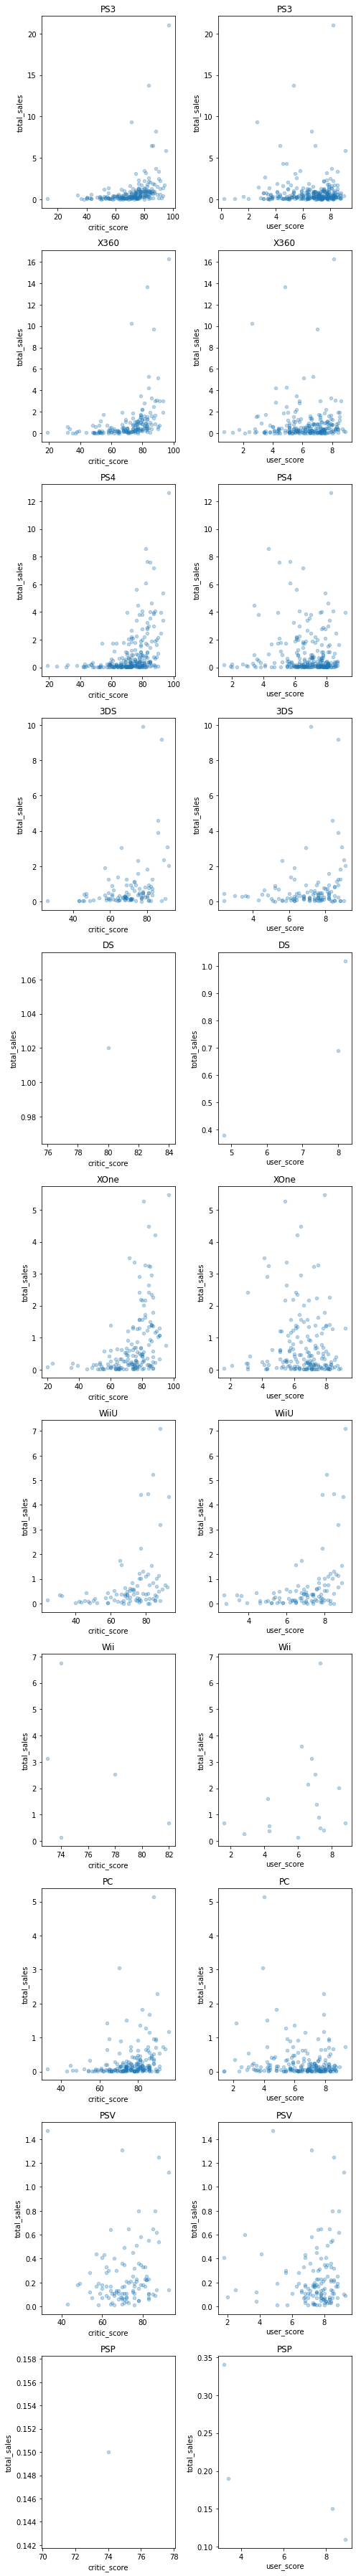

In [42]:
fig, axes = plt.subplots(
    len(new_games['platform'].unique()), 
    2
)

r = 0
for i in new_games['platform'].unique():
    c = 0
    for j in ['critic_score', 'user_score']:
        new_games.loc[
            new_games['platform'] == i
        ].plot.scatter(
            x=j, 
            y='total_sales', 
            alpha=.3, 
            ax=axes[r, c], 
            figsize=(7, 50), 
            title=i
        );
        c += 1
    r += 1

fig.tight_layout()
plt.show()

In [43]:
#посмотрим на общее распределение игр по жанрам
top_games = new_games.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'median', 'count')).sort_values(by='sum', ascending=False)
top_games.columns=['Количество игр', 'Медиана продаж', 'Сумма продаж, млн']
top_games

,Количество игр,Медиана продаж,"Сумма продаж, млн"
genre,,,
Action,1031,0.12,441.12
Shooter,235,0.44,304.73
Role-Playing,370,0.14,192.80
Sports,267,0.24,181.06
Misc,192,0.12,85.04
Platform,85,0.21,61.00
Racing,115,0.14,53.50
Fighting,109,0.13,44.49
Simulation,80,0.12,35.12


*Самым прибыльным жанром является Action, а также самым производимым за рассматриваемый период. Самым продаваемым жанром является Shooter. Среди аутсайдеров можно выделить жанр Adventure, который при 302 релизах в среднем покупался лишь 30 тысяч раз за 5 лет.*

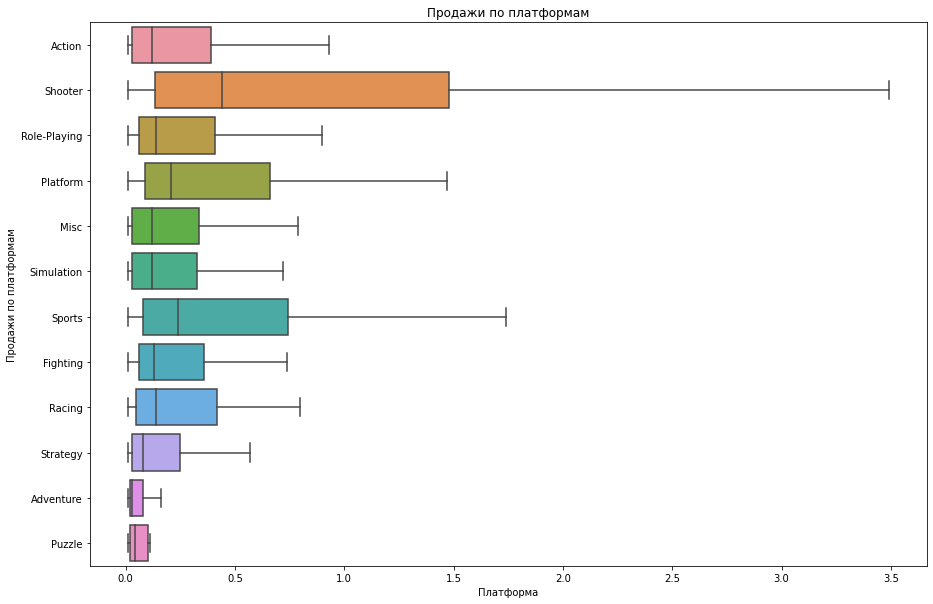

In [44]:
#построим боксплот по глобальным продажам по жанрам без выбросов
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=new_games.reset_index(), x='total_sales', y='genre', showfliers=False)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам');

Самый выпускаемый жанр - Action, а самый прибыльный жанр - Shooter. Среди аутсайдеров можно выделить жанр Adventure, который при 302 релизах в среднем покупался лишь 30 тысяч раз за 5 лет.

**Выводы по иследовательскому анализу данных:**

В последние 5 лет наблюдается отрицательная динамика в производстве игр, поэтому данный период был выбран за актуальный для прогнозирования продаж на 2017 год.

За актуальный период, лидерами продаж явлюются платформы PS4, PS3 и X360. Наблюдается общая тенденция спада уровня продаж из года в год, так как идет активное развитие технологий мобильных устройств, которые также позволяют устанавливать игры и польхзоваться ими в любой момент.

Отзывы пользователей и критиков не оказывают существенного влияния на продажи игр. Однако, к мнению критиков прислушиваются чуть больше.

Самый выпускаемый жанр - Action, а самый прибыльный жанр - Shooter. . Менее популярны жанры игр Adventure, Strategy и Puzzle, которые также имеют самый низкий показатель суммарных продаж.

#### Портрет пользователя каждого региона

In [45]:
#сделаем срез по топ-5 популярных платформ по регионам
na = new_games.groupby('platform')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu = new_games.groupby('platform')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp = new_games.groupby('platform')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()
na

,platform,na
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


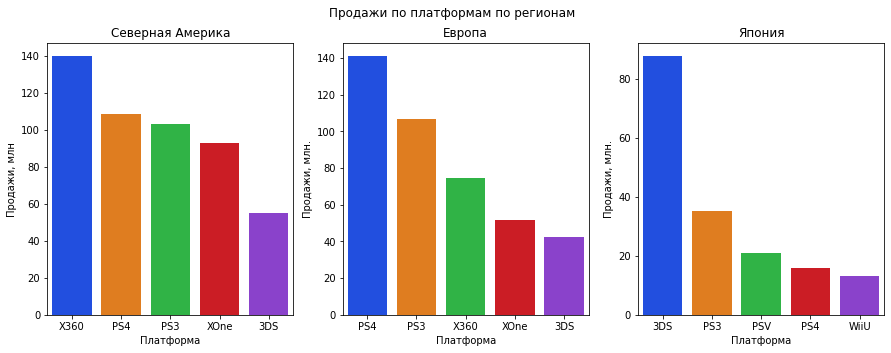

In [46]:
#выведем топ-5 популярных платформ по регионам
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по платформам по регионам')

sns.barplot(y='na', x='platform', data=na, ax=ax[0], palette='bright')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи, млн')
ax[0].set_xlabel('Платформа')

sns.barplot(y='eu', x='platform', data=eu, ax=ax[1], palette='bright')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи, млн.')
ax[1].set_xlabel('Платформа')

sns.barplot(y='jp', x='platform', data=jp, ax=ax[2], palette='bright')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи, млн.')
ax[2].set_xlabel('Платформа')
plt.show()

*Лидер продаж во всех регионах разный. Если в Северной Америке это X360, то в Японии эта платформа даже не входит в топ-5, там на первом месте платформа 3DS. В Европе самой популярной платформой является PS4. Стоит отметить, что только PS4 и PS3 входят в топ всех регионов.*

*Соотношение между топ-5 платформами в Северной Америке примерно одинаковое, нет явно выраженного лидера. X360 немного опережает платформы PS4 и PS3.*

*В Европе платформы фирмы PlayStation уже уверенно опережают платформу X360. Их суммарная доля более половины от общей.*

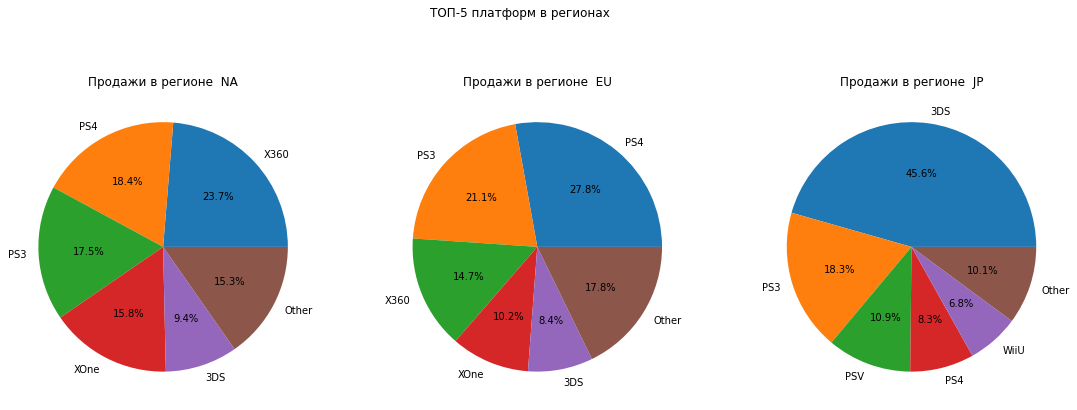

In [47]:
# Создание сводной таблицы
pivot = new_games.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

fig, axs = plt.subplots(1, 3, figsize=(19, 7)) # создаем фигуру с тремя осями в один ряд
fig.suptitle('ТОП-5 платформ в регионах') # подписываем ее

# Оставление только топ-5 значений и объединение остальных значений
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i, region in enumerate(regions):
    
    # Берем топ-5 
    top5 = pivot.nlargest(5, region)[region]
    # Остальные продажи сохраняем в категорию Other
    other = pivot[region].sum() - top5.sum()
    top5['Other'] = other
    top5.plot(kind='pie', autopct='%1.1f%%', ax=axs[i])
    axs[i].set_ylabel(None)  # убираем подпись оси у
    axs[i].set_title(f"Продажи в регионе  {region.split('_')[0].upper()}") # подписываем саму диаграмму
    
plt.show()

*В Японии подавляющее большинство пользователей используют платформу Nintendo. Платформы PS4 и PS3 в топ-5 и в этом регионе.*

In [48]:
#сделаем срез по топ-5 популярных жанров по регионам
na = new_games.groupby('genre')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu = new_games.groupby('genre')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp = new_games.groupby('genre')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

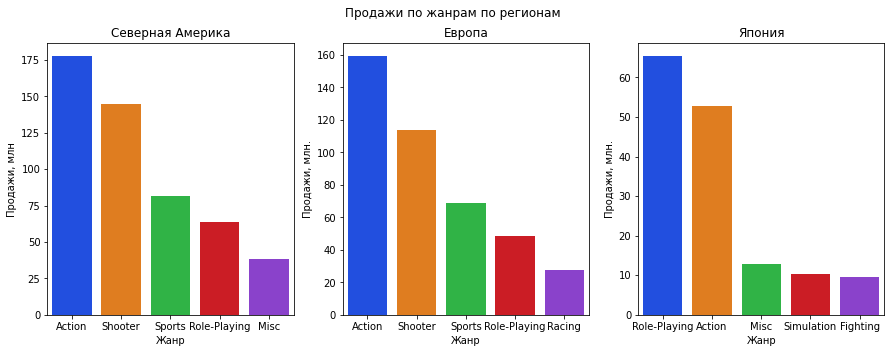

In [49]:
#выведем топ-5 популярных платформ по жанрам
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по жанрам по регионам')

sns.barplot(y='na', x='genre', data=na, ax=ax[0], palette='bright')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи, млн')
ax[0].set_xlabel('Жанр')

sns.barplot(y='eu', x='genre', data=eu, ax=ax[1], palette='bright')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи, млн.')
ax[1].set_xlabel('Жанр')

sns.barplot(y='jp', x='genre', data=jp, ax=ax[2], palette='bright')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи, млн.')
ax[2].set_xlabel('Жанр')
plt.show()

*Жанр игр Action самый популярный в Северной Америке и Европе, а также на втором месте в Японии. Поэтому можно судить о том, что это самый популярный жанр во всем мире, о чем свидетельствуют и ранее полученные. Также во всех регионаз в топ-5 представлен жанр Shooter, который является лидероми в Японии.*

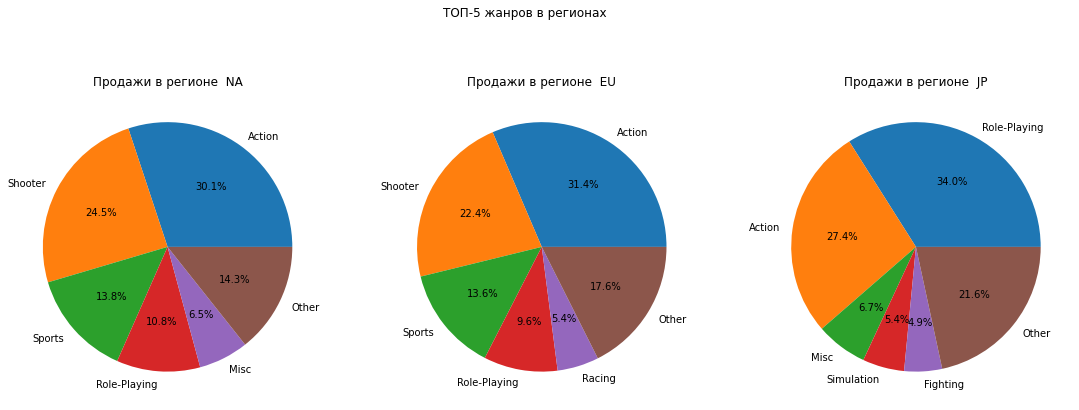

In [50]:
# Создание сводной таблицы
pivot = new_games.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

fig, axs = plt.subplots(1, 3, figsize=(19, 7)) # создаем фигуру с тремя осями в один ряд
fig.suptitle('ТОП-5 жанров в регионах') # подписываем ее

# Оставление только топ-5 значений и объединение остальных значений
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i, region in enumerate(regions):
    
    # Берем топ-5 
    top5 = pivot.nlargest(5, region)[region]
    # Остальные продажи сохраняем в категорию Other
    other = pivot[region].sum() - top5.sum()
    top5['Other'] = other
    top5.plot(kind='pie', autopct='%1.1f%%', ax=axs[i])
    axs[i].set_ylabel(None)  # убираем подпись оси у
    axs[i].set_title(f"Продажи в регионе  {region.split('_')[0].upper()}") # подписываем саму диаграмму
    
plt.show()

*В процентом соотношении жанры Action и Shooter купили более 60% от общего числа пользователей в Северной Америке.*

*В Европе данные по лидерам продаж по жанрам примерно идентичны с данными по Северной Америке.*

*В Японии практически половина пользователей предпочитает жанр игр Role-Playing, жанр Action, несмотря на второе место, имеет схожую с Северной Америкой и Европой долю.*

In [51]:
#оценим влияние рейтинга ESRB на продажи в каждом регионе
rating_value = pd.pivot_table(new_games, index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],
                                        aggfunc='sum').reset_index()
rating_value

,rating,eu_sales,jp_sales,na_sales
0,E,113.02,28.33,114.37
1,E10+,55.37,8.19,75.70
2,M,193.96,21.20,231.57
3,T,52.96,26.02,66.02
4,unknown,91.50,108.84,103.31


*В каждом регионе наблюдается своя картина по продажам игр, исходя из рейтинга ESRB. В Серверной Америке и Европе самое большое количество продаж с маркировкой "M" (Mature — Для взрослых). В Японии для большинства игр информация про возрастное ограничение отсутствует, распределение между маркировками "E" (Everyone — Для всех), "T" (Teen - подросткам) и "M" примерно одинаковое.*

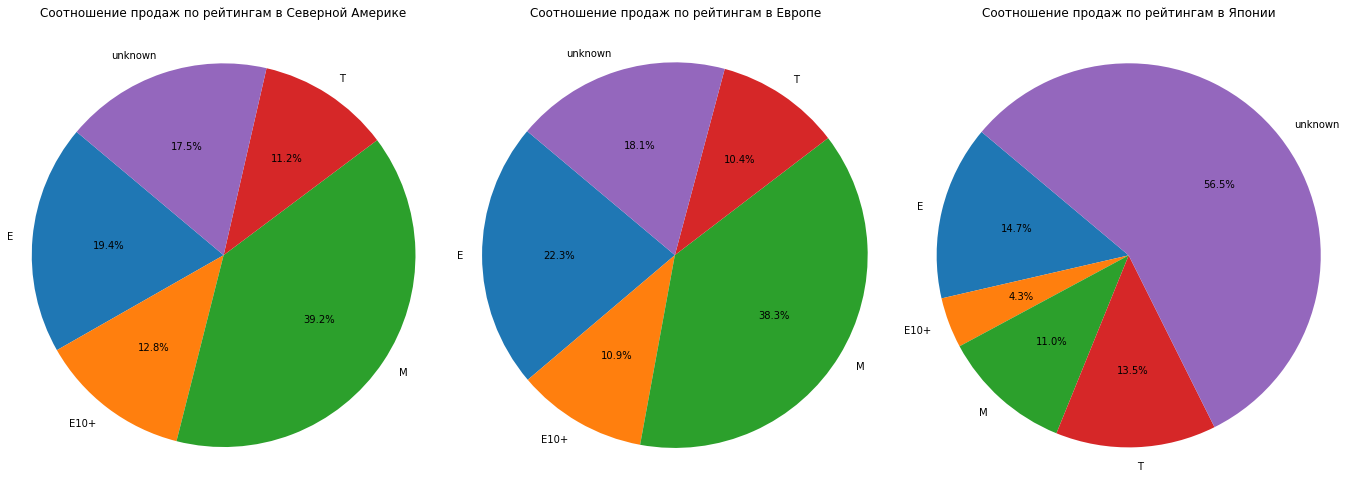

In [52]:
#построим визуализацию по рейтингам.
ratings = ['E', 'E10+', 'M', 'T', 'unknown']
na_sales = [114.37, 75.70, 231.57, 66.02, 103.31]
eu_sales = [113.02, 55.37, 193.96, 52.96, 91.50]
jp_sales = [28.33, 8.19, 21.20, 26.02, 108.84]

fig, axs = plt.subplots(1, 3, figsize=(19, 7))

axs[0].pie(na_sales, labels=ratings, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Соотношение продаж по рейтингам в Северной Америке')
axs[0].axis('equal')

axs[1].pie(eu_sales, labels=ratings, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Соотношение продаж по рейтингам в Европе')
axs[1].axis('equal') 

axs[2].pie(jp_sales, labels=ratings, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Соотношение продаж по рейтингам в Японии')
axs[2].axis('equal') 

plt.tight_layout() 
plt.show()

**Составляя портрет пользователя** *для Северной Америки и Европы мы наблюдаем, что самым популярным жанром является Action, Shooter и Sports с возрастной категорией "M". И если в Америке предпочитают играть на платформе X360, то в Европе это PS4 и PS3. В Японии портрет пользователя несколько отличается, самым популярным жанром является Role-Playing, среди платофрм уверенно лидирует Nintendo.*

#### Проверка гипотез

*Для проверки гипотезы применим тест Стюдента. В качестве критерия проверки гипотезы использовуем пороговое значение 0.05. Подобное значение выбрано в связи с тем, что проверяются значения не требующие высокой точности.*

*Проверим гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC*

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны

H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [53]:
#сделаем срез по платформам для дальнейшего анализа
xone_platform = new_games.query("platform == 'XOne' and user_score > 0")
pc_platform = new_games.query("platform == 'PC' and user_score > 0")

In [54]:
#проверим гипотезу
alpha = 0.05

results = st.ttest_ind(xone_platform['user_score'], pc_platform['user_score'])
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не удалось отвергнуть нулевую гипотезу


*При заданном уровне статистической значимости не получилось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Можно предположить, что средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.*

*Проверим гипотезу о неравенстве средних пользовательских рейтингов жанров Action и Sports*

H0: Средние пользовательские рейтинги жанров Action и Sports равны

H1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [55]:
#сделаем срез по жанрам для дальнейшего анализа
action_genre = new_games.query("genre == 'Action' and user_score > 0")
sports_genre = new_games.query("genre == 'Sports' and user_score > 0")

In [56]:
#проверим гипотезу
alpha = 0.05

results = st.ttest_ind(action_genre['user_score'], sports_genre['user_score'])
    
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


*Так как мы пошли от обратного и приняли нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны, что в конечном счете было отвергнуто при установленном уровне значимости, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports не равны и пользователи ставят разные оценки играм данных жанров.*

#### Общий вывод

В ходе исследования мы изучили данные по по компьютерным играм с целью спрогнозировать кампанию на 2017 год. 

На этапе подготовки данных, датафрейм был приведен к рабочему состоянию: названия всех столбцов были приведены к общему виду, данные были преобразованы к нужному для дальнейшего анализа типу, по возможности были заполнены пропуски и удалены неявные дубликаты, а также создан отдельный столбец с суммарными продажами во всех регионах.

На начальном этапе исследовательского анализа данных изучили, сколько игр выпускалось в разные годы, а также как менялись продажи по платформам и за какой характерный срок появляются новые и исчезают старые платформы. 

Исходя из полученных данных, для прогнозирования продаж на 2017 год был выбран период с 2012 по 2016 год.

Стоит отметить общую тенденцию спада продаж из-за развития мобильных устройств. Несмотря на это, рынок консолей все равно будет пользоваться популярностью, несмотря на ежегодное падение, так как мобильные устройства, исходя из свох характеристик (в первую очередь небольших экранов), никогда не смогут передать полную картину игры. 

Говоря о рекомендациях на 2017 год и далее, производителям стоит создавать консоли нового поколения, исходя из популярных консолей в регионе. Такие же рекомендации можно дать при производстве игр - жанры Action, Shooter и Sports продолжат пользоваться популярностью в Европе и Северной Америке, а Role-Playing в Японии. Желательно, чтобы эти игры попадали под маркировку "M", так как подавляющее большинство геймеров в Европе и Северной Америке попадают под эту категорию. 

Исходя из вышесказанного, рекомендацией для интернет-магазина "Стримчик" будет закупать игры жанра Action, Shooter и Sports с маркировкой "M" фирм PlayStation, Microsoft и Nintendo, которые выпускают плафтофрмы PS3, PS4, X360, XOne и 3DS соответственно. Стоит обратить внимание на отзывы пользователей и критиков, но как показали данные выше, они не являютмя определяющими при анализе продаж по регионам.